# Key Objectives are:


1. Explore the data – be creative and pay attention to the details. You need to provide the marketing team a better understanding of the characteristic features of respondents;

__2. Propose and describe a customer segmentation based on customers behaviors;__
3. Create a predictive model which allows the company to maximize the profit of the next marketing campaign.

In [2]:
#Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.io as pio
pio.renderers.default = "svg"

#quality figures
%config InlineBackend.figure_format = 'svg'


In [3]:
df = pd.read_csv('/Users/mgermano/Documents/coding_test/ifood/project_model_cluster/output/dataset.csv')
pd.DataFrame(df.dtypes, columns=['Type'])

,Type
ID,int64
Year_Birth,int64
Education,object
Marital_Status,object
Income,float64
Kidhome,int64
Teenhome,int64
Dt_Customer,object
Recency,int64
MntWines,int64


In [4]:
df['SumMnt'] = df.apply(lambda row: row.MntFishProducts + row.MntMeatProducts + row.MntFruits +
         row.MntSweetProducts + row.MntWines + row.MntGoldProds, axis=1)
df['SumPurchases'] = df.apply(lambda row: row.NumDealsPurchases + row.NumWebPurchases + row.NumCatalogPurchases	 +
         row.NumStorePurchases, axis=1)

In [5]:
# select the features we want
df_rfi = df[['SumMnt','Recency','Income','SumPurchases']]

# Rename the columns
df_rfi.rename(columns={'SumMnt': 'MonetaryValue',
                      'Recency':'Recency',
                      'Income':'Income',
                      'SumPurchases':'Purchases'}, inplace=True)

/Users/mgermano/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [6]:
df_rfi

,MonetaryValue,Recency,Income,Purchases
0,1617,58,58138.0,25
1,27,38,46344.0,6
2,776,26,71613.0,21
3,53,26,26646.0,8
4,422,94,58293.0,19
...,...,...,...,...
2235,1341,46,61223.0,18
2236,444,56,64014.0,22
2237,1241,91,56981.0,19
2238,843,8,69245.0,23


,MonetaryValue,Recency,Income,Purchases
count,2240.000000,2240.000000,2240.00000,2240.000000
mean,605.798214,49.109375,51963.20000,14.862054
std,602.249288,28.962453,21405.89641,7.677173
min,5.000000,0.000000,1730.00000,0.000000
25%,68.750000,24.000000,35538.75000,8.000000
50%,396.000000,49.000000,51373.00000,15.000000
75%,1045.500000,74.000000,68275.75000,21.000000
max,2525.000000,99.000000,162397.00000,44.000000


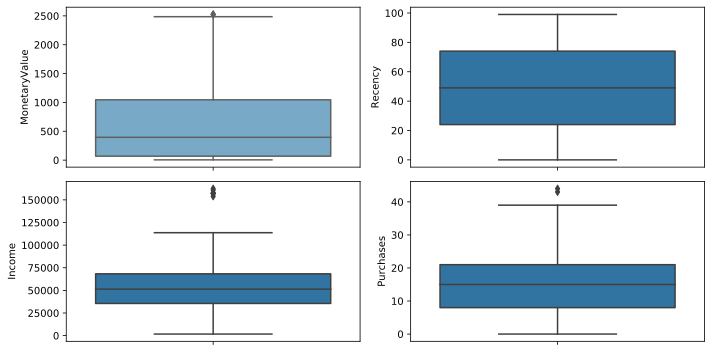

In [7]:
f, ax = plt.subplots(figsize=(10, 5))
plt.subplot(2,2,1)
ax1 = sns.boxplot(x=df_rfi["MonetaryValue"],palette="Blues",orient="v")
plt.subplot(2,2,2)
ax2 = sns.boxplot(x=df_rfi["Recency"],orient="v")
plt.subplot(2,2,3)
ax3 = sns.boxplot(x=df_rfi["Income"],orient="v")
plt.subplot(2,2,4)
ax4 = sns.boxplot(x=df_rfi["Purchases"],orient="v")
plt.tight_layout();
df_rfi.describe()

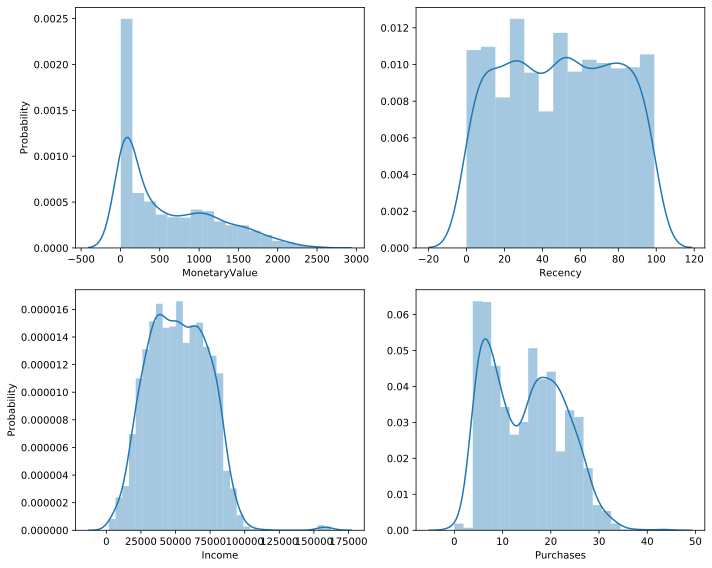

In [8]:
#plot distributions
f, ax = plt.subplots(figsize=(10, 8))
plt.subplot(2,2,1)
ax1 = sns.distplot(df_rfi["MonetaryValue"])
plt.subplot(2,2,2)
ax2 = sns.distplot(df_rfi["Recency"])
plt.subplot(2,2,3)
ax3 = sns.distplot(df_rfi["Income"])
plt.subplot(2,2,4)
ax4 = sns.distplot(df_rfi["Purchases"])

ax1.set_ylabel('Probability')
ax3.set_ylabel('Probability')
plt.tight_layout();



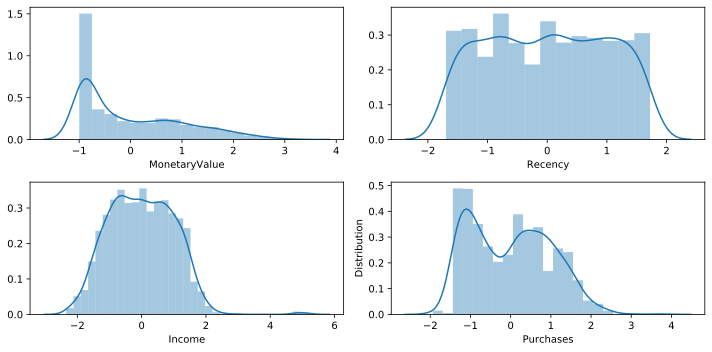

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
scaled_df = pd.DataFrame(scaler.fit_transform(df_rfi))
# Rename the columns
scaled_df.rename(columns={0: 'MonetaryValue',
                      1:'Recency',
                      2:'Income',
                      3:'Purchases'}, inplace=True)

#plot distributions
f, ax = plt.subplots(figsize=(10, 5))
plt.subplot(2,2,1)
ax1 = sns.distplot(scaled_df["MonetaryValue"])
plt.subplot(2,2,2)
ax2 = sns.distplot(scaled_df["Recency"])
plt.subplot(2,2,3)
ax2 = sns.distplot(scaled_df["Income"])
plt.subplot(2,2,4)
ax2 = sns.distplot(scaled_df["Purchases"])
plt.ylabel('Distribution')
plt.tight_layout();

## Clustering

In [10]:
from pycaret.clustering import *

In [11]:
clust = setup(df_rfi, normalize = True,normalize_method='zscore',
                   transformation=False,session_id = 1,ignore_features = ['Recency'])


Setup Succesfully Completed!


,Description,Value
0,session_id,1
1,Original Data,"(2240, 4)"
2,Missing Values,False
3,Numeric Features,4
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,Transformed Data,"(2240, 3)"
8,Numeric Imputer,mean
9,Categorical Imputer,constant


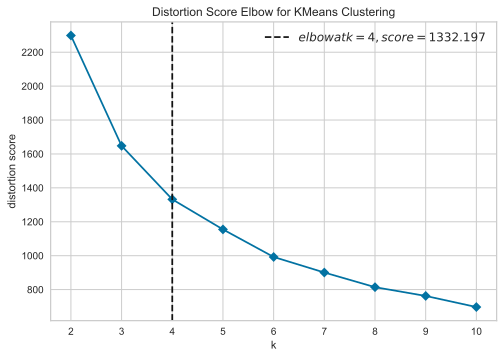

In [12]:
kmeans = create_model('kmeans')
plot_model(kmeans, plot = 'elbow')

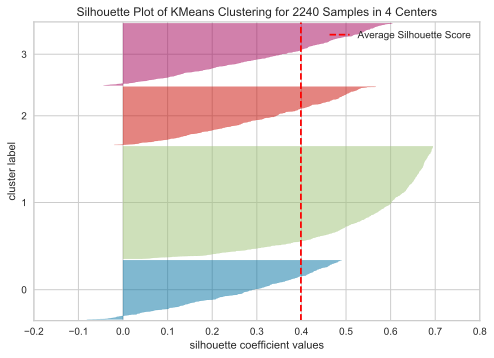

In [13]:
kmeans = create_model('kmeans',num_clusters=4)

plot_model(kmeans, plot = 'silhouette')

In [14]:
plot_model(kmeans, plot = 'distribution')

### Evaluation


In [15]:
kmeans_model = create_model('kmeans',num_clusters = 4) 

In [16]:
plot_model(kmeans_model,plot='tsne')

In [17]:
plot_model(kmeans_model,plot='distribution',feature='Income')

In [18]:
plot_model(kmeans_model,plot='distribution',feature='MonetaryValue')

In [19]:
plot_model(kmeans_model,plot='distribution',feature='Purchases')

In [21]:
df_cluster = assign_model(kmeans_model, transformation = False, verbose = True)
df_concat = pd.concat([df, df_cluster['Cluster']], axis=1, sort=False)
df_concat.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,SumMnt,SumPurchases,Cluster
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,3,11,1,57,1617,25,Cluster 2
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,3,11,0,60,27,6,Cluster 1
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,3,11,0,49,776,21,Cluster 2
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,3,11,0,30,53,8,Cluster 1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,3,11,0,33,422,19,Cluster 3


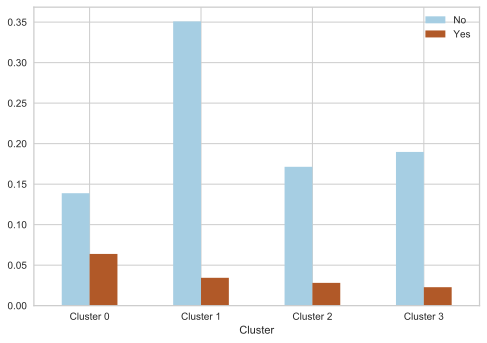

In [22]:

def prob_df(df,variable):
    rating_probs_no = pd.DataFrame(df[df.Response == 0].groupby(variable).size().div(len(df)))
    rating_probs_yes = pd.DataFrame(df[df.Response == 1].groupby(variable).size().div(len(df)))
    df_2 = rating_probs_no.merge(rating_probs_yes,how='outer',left_index=True, right_index=True)
    df_2.columns = ['No', 'Yes']
    return df_2

prob_df(df_concat,'Cluster').plot.bar(rot=0,colormap='Paired');